In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt4, analyze_expt5

In [5]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt4.get_categ_info()

trial_data_all1, subjects1, cue_level_names, image_type_names = analyze_expt4.load_data()
trial_data_all2, subjects2, cue_level_names, image_type_names = analyze_expt5.load_data()
 
n_subjects1 = len(subjects1)
n_subjects2 = len(subjects2)

n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition1, dprime_by_condition1, propyes_by_condition1, rt_by_condition1 = analyze_expt4.get_perf_by_cond()
acc_by_condition2, dprime_by_condition2, propyes_by_condition2, rt_by_condition2 = analyze_expt5.get_perf_by_cond()

acc_by_nat1, dprime_by_nat1, rt_by_nat1 = analyze_expt4.get_perf_by_nat()
acc_by_nat2, dprime_by_nat2, rt_by_nat2 = analyze_expt5.get_perf_by_nat()

cue_level_names = ['Fine','Coarse']
expt_names = ['Color expt','Grayscale expt']
kind_names = ['Artificial','Natural']
n_kinds = 2

In [6]:
subjects1, subjects2

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]))

In [7]:
# cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
cue_level_colors = np.array([[130, 181, 216], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

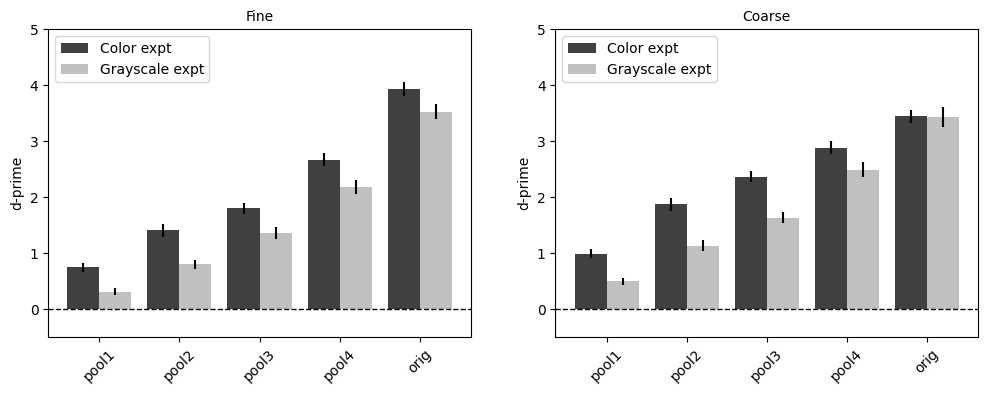

In [8]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

plt.figure(figsize=(12,4))

for cc, cue in enumerate(cue_level_names):

    
    ax = plt.subplot(1,2,cc+1)
    lh = []

    for ee, dvals in enumerate([dprime_by_condition1, dprime_by_condition2]):


        vals = dvals[:,cc,:]
        n_subs_plot = vals.shape[0]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                meanvals, \
                color = color_cond_colors[ee,:], width=barwidth)
        plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                         meanvals, \
                         semvals, \
                         color = 'k', linestyle='none')
                        # color = color_cond_colors[ee,:])
        lh.append(h)

        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


    # plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, expt_names, loc='upper left')

    plt.ylabel('d-prime')

    plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

    plt.ylim([-.5, 5.0])

    plt.title('%s'%(cue_level_names[cc]))
    

In [9]:
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [10]:
var1, var2, var3 = 'cue_level','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

'value ~ C(cue_level) + C(image_type) + C(color_cond) + C(cue_level):C(image_type) + C(cue_level):C(color_cond) + C(image_type):C(color_cond) + C(cue_level):C(image_type):C(color_cond) + 1'

In [11]:
atab = []

for ee, dvals in enumerate([dprime_by_condition1, dprime_by_condition2]):

    vals = dvals[:,:,:]

    for cc in range(n_cue_levels):
        for ii in range(n_image_types):
            for ss in range(vals.shape[0]):

                # [cue level, image type, color cond, value]
                atab.append([cc,ii,ee,vals[ss,cc,ii]])

df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])

model = ols(model_str, data = df).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,6.064357,6.064357,15.843145,7.754668e-05
C(image_type),4.0,622.636019,155.659005,406.659485,1.106851e-166
C(color_cond),1.0,33.919892,33.919892,88.615791,1.114328e-19
C(cue_level):C(image_type),4.0,10.050360,2.512590,6.564147,3.597428e-05
C(cue_level):C(color_cond),1.0,0.000018,0.000018,0.000048,9.944776e-01
C(image_type):C(color_cond),4.0,3.623183,0.905796,2.366393,5.172957e-02
C(cue_level):C(image_type):C(color_cond),4.0,2.033681,0.508420,1.328249,2.580725e-01
Residual,580.0,222.009386,0.382775,NaN,NaN


#### Splitting into "natural/artificial" categories

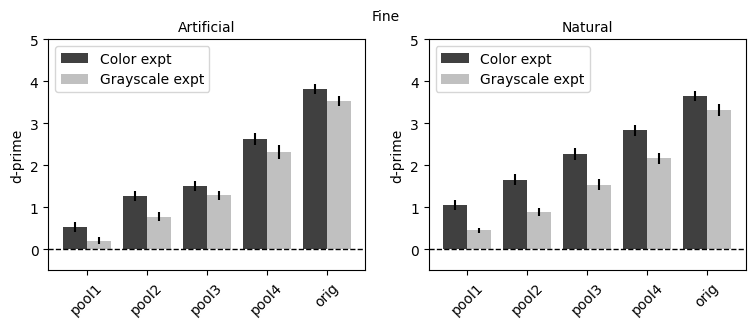

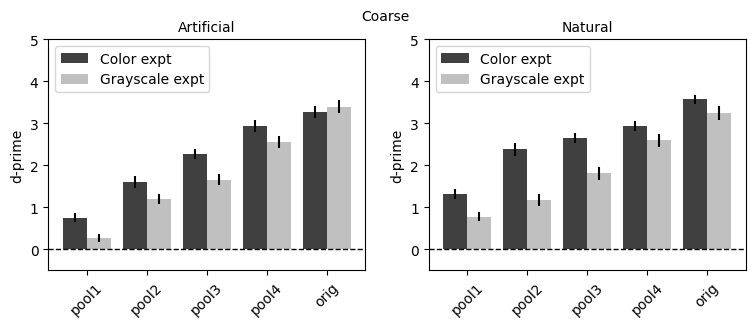

In [12]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

for cc, cue in enumerate(cue_level_names):

    plt.figure(figsize=(9,3))

    for kk in range(2):
        
        ax = plt.subplot(1,2,kk+1)
        lh = []

        for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):

            vals = dvals[:,cc,:,kk]
            n_subs_plot = vals.shape[0]

            meanvals = np.mean(vals, axis=0)
            semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

            h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, width = barwidth, \
                        color = color_cond_colors[ee,:])
            plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, \
                             semvals, \
                             color='k', linestyle='none')
                            # color = color_cond_colors[ee,:])
            lh.append(h)

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        # plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, expt_names, loc='upper left')

        plt.ylabel('d-prime')

        plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

        plt.ylim([-.5, 5.0])

        plt.title('%s'%(kind_names[kk]))
    
    plt.suptitle(cue_level_names[cc])
    

#### three way anova: naturalness x image type x color 

In [16]:
var1, var2, var3 = 'naturalness','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

a_all = []

for cc in [0,1]:
    
    atab = []
    
    for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):
    
        vals = dvals[:,cc,:,:]
    
        for ii in range(n_image_types):
            for kk in range(n_kinds):
                for ss in range(vals.shape[0]):
    
                    # [cue level, image type, color cond, value]
                    atab.append([kk,ii,ee,vals[ss,ii,kk]])
    
    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3, 'value'])
    
    model = ols(model_str, data = df).fit()
    
    a = anova_lm(model)

    a_all.append(a)

In [17]:
cc = 0;

print('%s task'%cue_level_names[cc])

a_all[cc]

Fine task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,5.646111,5.646111,12.216166,5.099584e-04
C(image_type),4.0,670.440009,167.610002,362.648096,3.176374e-156
C(color_cond),1.0,33.968327,33.968327,73.495310,9.175477e-17
C(naturalness):C(image_type),4.0,9.376396,2.344099,5.071792,5.051796e-04
C(naturalness):C(color_cond),1.0,3.148095,3.148095,6.811352,9.291930e-03
C(image_type):C(color_cond),4.0,1.559005,0.389751,0.843282,4.980512e-01
C(naturalness):C(image_type):C(color_cond),4.0,0.859155,0.214789,0.464726,7.616486e-01
Residual,580.0,268.066487,0.462184,NaN,NaN


In [18]:
cc = 1;

print('%s task'%cue_level_names[cc])

a_all[cc]

Coarse task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,9.595439,9.595439,17.711079,2.979195e-05
C(image_type),4.0,486.198557,121.549639,224.354016,3.066540e-116
C(color_cond),1.0,37.881584,37.881584,69.921108,4.599522e-16
C(naturalness):C(image_type),4.0,5.248116,1.312029,2.421718,4.727256e-02
C(naturalness):C(color_cond),1.0,3.386055,3.386055,6.249917,1.269495e-02
C(image_type):C(color_cond),4.0,9.763687,2.440922,4.505407,1.363786e-03
C(naturalness):C(image_type):C(color_cond),4.0,3.541434,0.885358,1.634178,1.640774e-01
Residual,580.0,314.230126,0.541776,NaN,NaN
